# Scraping: récupération des PDFs des bulletins AVB

## Imports

In [207]:
import os
import re
import time
import sys
import requests

## Créer un répertoire pour stocker tous les fichiers PDF

In [208]:
pdf_path = '../data/rapport'
# Créer le dossier s'il n'existe pas
if not os.path.exists(pdf_path):
    os.mkdir(pdf_path)

## Récupérer les URLs des pdf des rapportsles bulletins communaux

https://archives.bruxelles.be/bulletins/date

In [209]:
root_url = "https://archives.bruxelles.be/bulletins/date"
resp = requests.get(root_url)
print(f"Status: {resp.status_code}")
print(f"Encoding: {resp.encoding}")
html = resp.text
print(f"Text length: {len(html)}")
pattern = r"https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/.*RptAn.*\.pdf"
urls = re.findall(pattern, html)
print(f"{len(urls)} PDF files found")

Status: 200
Encoding: utf-8
Text length: 821446
187 PDF files found


In [210]:
# Impression des 10 premières URLs
print(urls[:10])

['https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_1.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_10.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_2.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_3.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_4.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_5.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_6.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_7.pdf', 'https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/Lkn_1874_Tome_RptAn_Part_8.pdf', 'https://archief.

## Télécharger tous les PDFs

In [ ]:
start_offset = 0
end_offset = len(urls)
for url in urls[start_offset:end_offset]:
    filename = url.split("/")[-1]
    if not os.path.exists(os.path.join(pdf_path, filename)):
        print(f"Downloading {filename}...")
        start_time = time.time()
        response = requests.get(url)
        print(f"   done in {(time.time() - start_time):.1f} seconds")
        output_file = open(os.path.join(pdf_path, filename), "wb")
        output_file.write(response.content)
    else:
        print(f"{filename} already downloaded")
print("Done")

## Vérifier que tous les PDFs ont été téléchargés


Si ce n'est pas le cas, vous pouvez relancer l'étape de téléchargement (elle ignorera les documents déjà téléchargés)

In [211]:
ok_count = 0
for url in urls:
    filename = url.split("/")[-1]
    downloads = os.listdir(pdf_path)
    if filename not in downloads:
        print(f"{filename} is missing!")
    else:
        ok_count += 1
print(f"{ok_count} PDFs found on {len(urls)}!")

187 PDFs found on 187!


# Conversion de fichiers PDF en fichiers TXT

## Imports

In [212]:
import os
import textract

## Lister les fichiers dans `data/rapport`

In [213]:
pdf_path = '../data/rapport'

#pdfs = [f for f in os.listdir(pdf_path) if os.path.isfile(os.path.join(pdf_path, f))]
pdfs = []
for f in os.listdir(pdf_path):
    if os.path.isfile(os.path.join(pdf_path, f)):
        pdfs.append(f)
pdfs[:5]

['Bxl_1958_Tome_RptAn_Part_1.pdf',
 'Bxl_1958_Tome_RptAn_Part_10.pdf',
 'Bxl_1958_Tome_RptAn_Part_2.pdf',
 'Bxl_1958_Tome_RptAn_Part_3.pdf',
 'Bxl_1958_Tome_RptAn_Part_4.pdf']

## Créer un répertoire TXT s'il n'existe pas encore

In [214]:
txt_path = '../data/raptxt'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

## Lister les fichiers dans `data/txt`

In [215]:
txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
txts[:15]

['Bxl_1958_Tome_RptAn_Part_1.txt',
 'Bxl_1958_Tome_RptAn_Part_10.txt',
 'Bxl_1958_Tome_RptAn_Part_2.txt',
 'Bxl_1958_Tome_RptAn_Part_3.txt',
 'Bxl_1958_Tome_RptAn_Part_4.txt',
 'Bxl_1958_Tome_RptAn_Part_5.txt',
 'Bxl_1958_Tome_RptAn_Part_6.txt',
 'Bxl_1958_Tome_RptAn_Part_7.txt',
 'Bxl_1958_Tome_RptAn_Part_8.txt',
 'Bxl_1958_Tome_RptAn_Part_9.txt',
 'Bxl_1959_Tome_RptAn_Part_1.txt',
 'Bxl_1959_Tome_RptAn_Part_10.txt',
 'Bxl_1959_Tome_RptAn_Part_3.txt',
 'Bxl_1959_Tome_RptAn_Part_5.txt',
 'Bxl_1959_Tome_RptAn_Part_6.txt']

In [216]:
#  Lister les fichiers pdf qui n'ont pas encore été convertis en txt
not_converted_pdfs = []
for pdf in pdfs:
    file_name = os.path.splitext(pdf)[0]
    if file_name + ".txt" not in txts:
        not_converted_pdfs.append(pdf)
len(not_converted_pdfs)
print(not_converted_pdfs)

['Bxl_1959_Tome_RptAn_Part_2.pdf', 'Bxl_1959_Tome_RptAn_Part_4.pdf', 'Bxl_1961_Tome_RptAn_Part_2.pdf', 'Bxl_1961_Tome_RptAn_Part_3.pdf', 'Bxl_1961_Tome_RptAn_Part_5.pdf']


## Convertir les fichiers PDFs en TXT

In [190]:
for pdf in not_converted_pdfs:
    print(pdf)
    try:
        text = textract.process(os.path.join(pdf_path, pdf))
        with open(os.path.join(txt_path, f'{os.path.splitext(pdf)[0]}.txt'), 'wb') as output_file:
            output_file.write(text)
    except:
        print("Error with following file:", pdf)

Bxl_1959_Tome_RptAn_Part_2.pdf
Error with following file: Bxl_1959_Tome_RptAn_Part_2.pdf
Bxl_1959_Tome_RptAn_Part_4.pdf
Error with following file: Bxl_1959_Tome_RptAn_Part_4.pdf
Bxl_1961_Tome_RptAn_Part_2.pdf
Error with following file: Bxl_1961_Tome_RptAn_Part_2.pdf
Bxl_1961_Tome_RptAn_Part_3.pdf
Error with following file: Bxl_1961_Tome_RptAn_Part_3.pdf
Bxl_1961_Tome_RptAn_Part_5.pdf
Error with following file: Bxl_1961_Tome_RptAn_Part_5.pdf


## Créer un grand fichier 'corpus': commande bash

- `cat` permet d'imprimer le contenu de fichiers textes
- Un pattern (ici `../*.txt`) permet d'appliquer la commande sur tous les fichiers qui matchent
- `>` permet de rediriger le résultat de la commande précédente dans un fichier

Pour en savoir plus sur les flux de redirections :
https://openclassrooms.com/fr/courses/43538-reprenez-le-controle-a-laide-de-linux/40444-les-flux-de-redirection

In [217]:
!cat ../data/raptxt/*.txt > ../data/rapt_all.txt

## Compter le nombre de mots dans l'ensemble du corpus

In [218]:
!wc ../data/rapt_all.txt

 1269836  4225091 20966122 ../data/rapt_all.txt


On obtient ici, dans l'ordre, le nombre de lignes, de mots, d'octets.

Pour en savoir plus sur la commande wc: https://fr.wikipedia.org/wiki/Wc_(Unix)

# Explorer un corpus

## Imports

In [219]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np


In [220]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Compter le nombre de documents dans le corpus

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

## Quelques statistiques

In [221]:
all_years = [str(year) for year in range(1847, 1978)]

In [222]:
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 1
        count_cities[city] += 1
        count_tomes[tome] += 1
    else:
        print(f"Anomalous file: {f}")

In [223]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles et {count_cities['Lkn']} de Laeken")

Il y a 120 bulletins de Bruxelles et 0 de Laeken


In [224]:
nb_rap = count_tomes['RptAn']
print(f"{nb_rap} documents sont des rapports annuels")

120 documents sont des rapports annuels


In [225]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1967, 1968


In [226]:
print(f"Années présentes: {covered_years}")

Années présentes: {'1970', '1978', '1966', '1964', '1975', '1961', '1969', '1971', '1976', '1960', '1965', '1963', '1974', '1958', '1977', '1973', '1959', '1972', '1962'}


## Visualisation du nombre de bulletins par communes

Ces visualisations sont obtenus avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

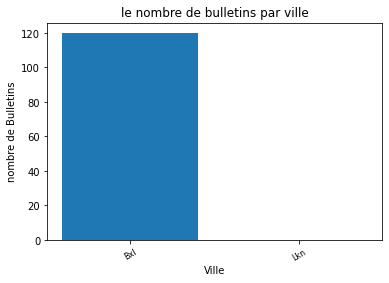

In [227]:
#index = np.arange(len(count_cities))
index =np.arange(len(count_cities))
plt.bar(index, count_cities.values())
plt.xlabel('Ville')
plt.ylabel('nombre de Bulletins')
plt.xticks(index, count_cities.keys(), fontsize=8, rotation=30)
plt.title('le nombre de bulletins par ville')
plt.show()

# Analyse de la distribution du vocabulaire

## Imports et dépendances

In [228]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [229]:
sw = stopwords.words("french")
sw += ["a","à","â","abord","afin","ah","ai","aie",
       "ainsi","allaient","allo","allô","allons","après",
       "assez","attendu","au","aucun","aucune","aujourd",
       "aujourd'hui","auquel","aura","auront","aussi",
       "autre","autres","aux","auxquelles","auxquels",
       "avaient","avais","avait","avant","avec","avoir",
       "ayant","b","bah","beaucoup","bien","bigre","boum","bravo",
       "brrr","c","ça","car","ce","ceci","cela","celle","celle-ci",
       "celle-là","celles","celles-ci","celles-là","celui","celui-ci",
       "celui-là","cent","cependant","certain","certaine","certaines",
       "certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là",
       "chacun","chaque","cher","chère","chères","chers","chez","chiche",
       "chut","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième",
       "clac","clic","combien","comme","comment","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","delà","depuis","derrière","des","dès","désormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","différent","différente","différentes","différents","dire","divers","diverse","diverses","dix","dix-huit","dixième","dix-neuf","dix-sept","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","e","effet","eh","elle","elle-même","elles","elles-mêmes","en","encore","entre","envers","environ","es","ès","est","et","etant","étaient","étais","était","étant","etc","été","etre","être","eu","euh","eux","eux-mêmes","excepté","f","façon","fais","faisaient","faisant","fait","feront","fi","flac","floc","font","g","gens","h","ha","hé","hein","hélas","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","i","il","ils","importe","j","je","jusqu","jusque","k","l","la","là","laquelle","las","le","lequel","les","lès","lesquelles","lesquels","leur","leurs","longtemps","lorsque","lui","lui-même","m","ma","maint","mais","malgré","me","même","mêmes","merci","mes","mien","mienne","miennes","miens","mille","mince","moi","moi-même","moins","mon","moyennant","n","na","ne","néanmoins","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notre","nôtre","nôtres","nous","nous-mêmes","nul","o","o|","ô","oh","ohé","olé","ollé","on","ont","onze","onzième","ore","ou","où","ouf","ouias","oust","ouste","outre","p","paf","pan","par","parmi","partant","particulier","particulière","particulièrement","pas","passé","pendant","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","plein","plouf","plus","plusieurs","plutôt","pouah","pour","pourquoi","premier","première","premièrement","près","proche","psitt","puisque","q","qu","quand","quant","quanta","quant-à-soi","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelque","quelques","quelqu'un","quels","qui","quiconque","quinze","quoi","quoique","r","revoici","revoilà","rien","s","sa","sacrebleu","sans","sapristi","sauf","se","seize","selon","sept","septième","sera","seront","ses","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","stop","suis","suivant","sur","surtout","t","ta","tac","tant","te","té","tel","telle","tellement","telles","tels","tenant","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutes","treize","trente","très","trois","troisième","troisièmement","trop","tsoin","tsouin","tu","u","un","une","unes","uns","v","va","vais","vas","vé","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vôtre","vôtres","vous","vous-mêmes","vu","w","x","y","z","zut","alors","aucuns","bon","devrait","dos","droite","début","essai","faites","fois","force","haut","ici","juste","maintenant","mine","mot","nommés","nouveaux","parce","parole","personnes","pièce","plupart","seulement","soyez","sujet","tandis","valeur","voie","voient","état","étions"]
sw = set(sw)

In [230]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

563 stopwords:
 ['a', 'abord', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'b', 'bah', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'brrr', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chaque', 'cher', 'chers', 'chez', 'chiche', 'chut', 'chère', 'chères', 'ci', 'cinq', 'c

## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [231]:
# Choisir une année
year = 1958

In [232]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/raptxtBx'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1958_Tome_RptAn_Part_1.txt',
 'Bxl_1958_Tome_RptAn_Part_10.txt',
 'Bxl_1958_Tome_RptAn_Part_2.txt',
 'Bxl_1958_Tome_RptAn_Part_3.txt',
 'Bxl_1958_Tome_RptAn_Part_4.txt',
 'Bxl_1958_Tome_RptAn_Part_5.txt',
 'Bxl_1958_Tome_RptAn_Part_6.txt',
 'Bxl_1958_Tome_RptAn_Part_7.txt',
 'Bxl_1958_Tome_RptAn_Part_8.txt',
 'Bxl_1958_Tome_RptAn_Part_9.txt']

In [233]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [234]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

10

In [235]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"VILLE\n\nDE\n\nBRUXELLES\n\nRAPPORT\n\nANNUEL\n\nPRESENTE\nA U CONSEIL C O M M U N A L E N SEANCE D U 6 O C T O B R E 1958\nPAR L E C O L L E G E DES BOURGMESTRE E T ECHEVINS\nen exécution de l'article 70 de la lo"

In [236]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [237]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"VILLE\n\nDE\n\nBRUXELLES\n\nRAPPORT\n\nANNUEL\n\nPRESENTE\nA U CONSEIL C O M M U N A L E N SEANCE D U 6 O C T O B R E 1958\nPAR L E C O L L E G E DES BOURGMESTRE E T ECHEVINS\nen exécution de l'article 70 de la loi du 30 mars 1836\n\nIMPRIMERIE H. & M. SCHAUMANS, S. A.\n41, parvis Saint-Gilles\nBRUXELLES\n\n1958\n\n\x0c\x0cCHAPITRE\n\nPREMIER\n\nAdministration\n\n\x0c\x0cCHAPITRE\n\nPREMIER\n\nAdministration\nL e Conseil s'est réuni 60 fois au cours de l'année 1957.\nIl a tenu en outre 18 séances des Sections réunies, 152 séances des Secti"

In [238]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [239]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1958_clean.txt!'

In [240]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'ville bruxelles rapport annuel presente conseil seance bourgmestre echevins exécution article loi mars imprimerie schaumans parvis saint gilles bruxelles chapitre administration chapitre administration conseil réuni cours année tenu séances sections réunies séances sections séances commissions comités visité chantiers internationale théâtre fondations réunies cité jouët rey juliette inauguré brigade canine police locaux service ves assisté essais carillon électronique hôtel année collège réuni p'

## Nuage de mots

### Afficher les termes les plus fréquents


In [241]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('élèves', 548), ('année', 526), ('bruxelles', 455), ('cours', 452), ('enfants', 414), ('rue', 370), ('école', 297), ('service', 295), ('scolaire', 286), ('travaux', 277)]


### Créer, stocker et afficher le nuage de mots

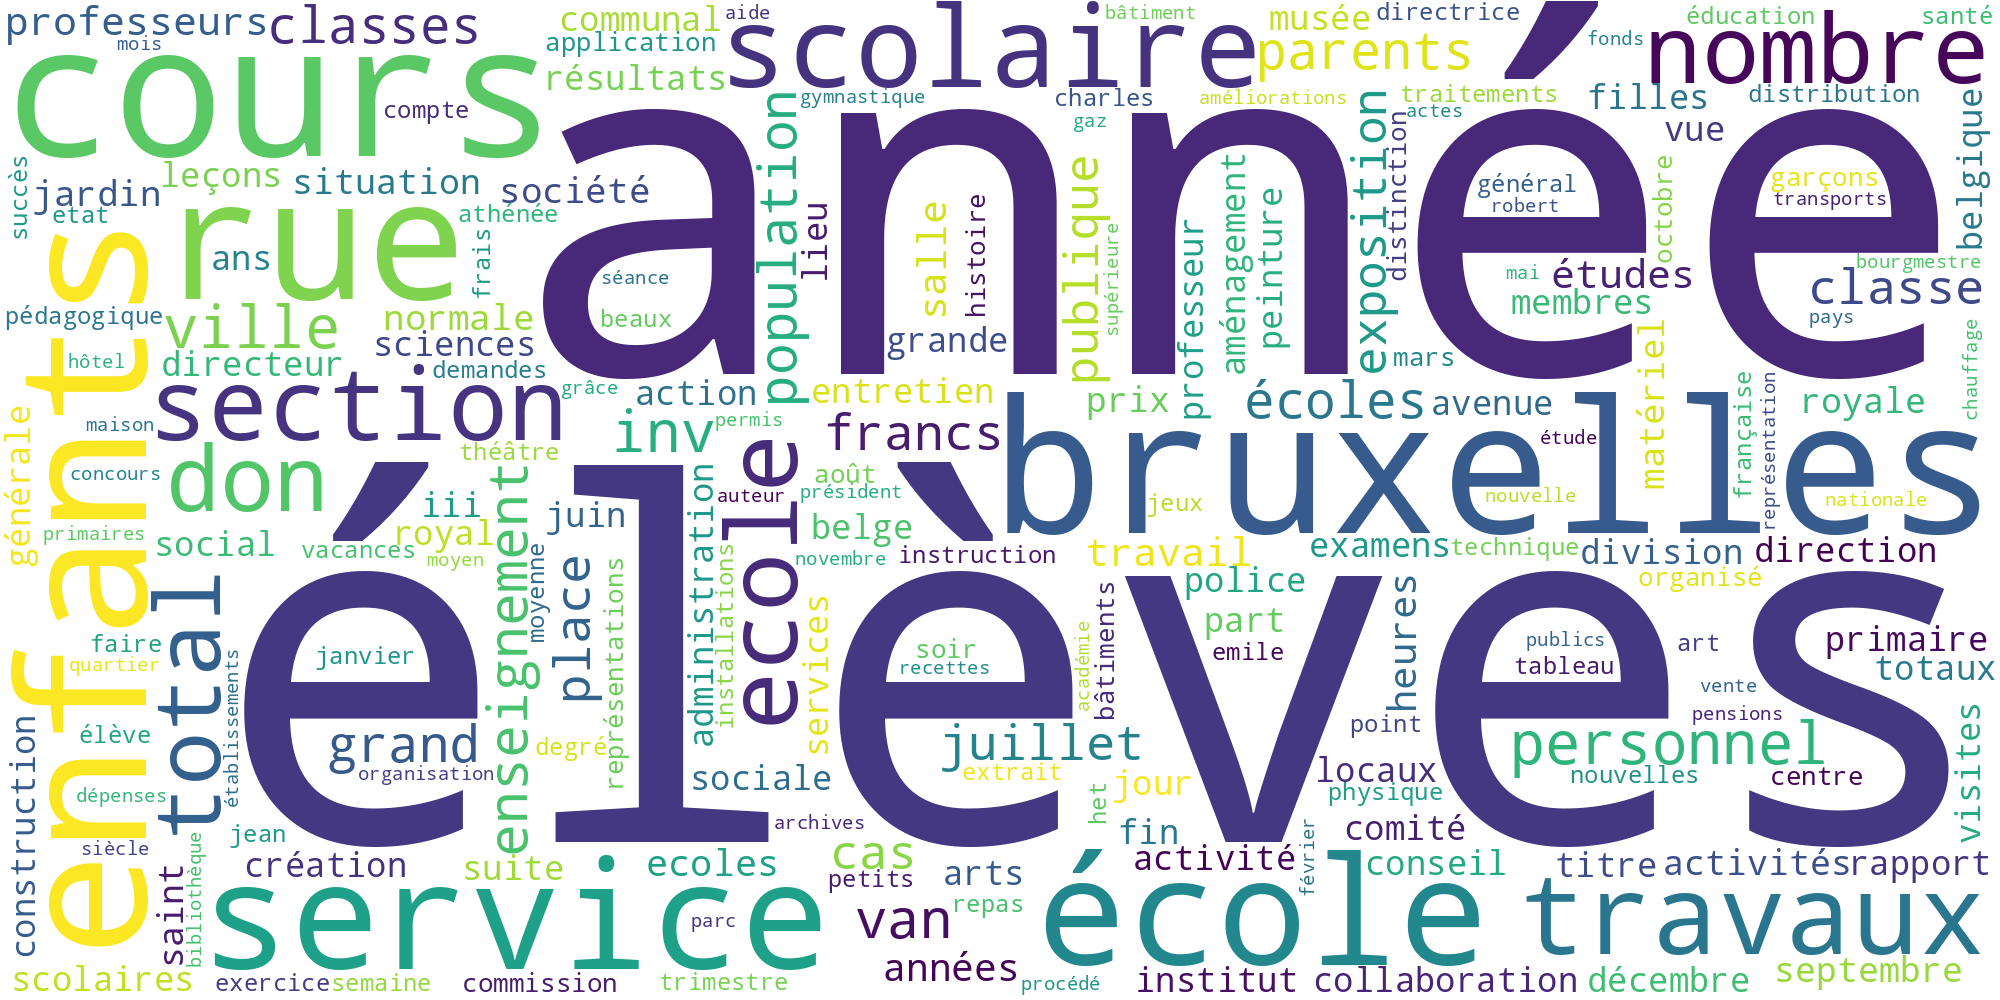

In [242]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Tokeniser

## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [243]:
# Récupération du contenu du fichier
path = "../data/tmp/1958_clean.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [244]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

65504 words found


In [245]:
words[:10]

['ville',
 'bruxelles',
 'rapport',
 'annuel',
 'presente',
 'conseil',
 'seance',
 'bourgmestre',
 'echevins',
 'exécution']

## Calculer la taille du vocabulaire

In [246]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

65504 words kept (13352 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [247]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('élèves', 548),
 ('année', 526),
 ('bruxelles', 455),
 ('cours', 452),
 ('enfants', 414),
 ('rue', 370),
 ('école', 297),
 ('service', 295),
 ('scolaire', 286),
 ('travaux', 277)]

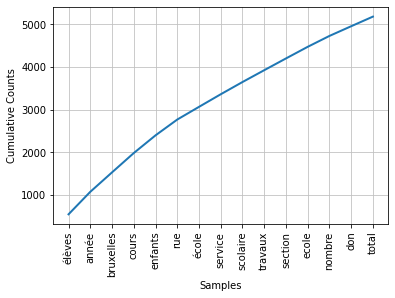

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [248]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [249]:
fdist.hapaxes()[:30]

['presente',
 'seance',
 'schaumans',
 'électronique',
 'fiq',
 'salarié',
 'rombaut',
 'meert',
 'détaché',
 'égarées',
 'volées',
 'vannée',
 'rédacteurs',
 'doueheurs',
 'manœuvres',
 'conducteurs',
 'conducteur',
 'allouees',
 'facultative',
 'tratif',
 'technic',
 'octoque',
 'penc',
 'octosions',
 'personbre',
 'faculd',
 'tech',
 'oit',
 'decorations',
 'examinees']

## Trouver les mots les plus longs du corpus

In [250]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['onsterfelijkheidsgeloof',
 'wereldtentoonstelling',
 'photolithographiques',
 'antipoliomyélitiques',
 'antipoliomyélitique',
 'électrocardiogramme',
 'prijzengeschiedenis',
 'complémentairement',
 'levisinstiannuelle',
 'psychotechnicienne',
 'consciencieusement',
 'approvisionnements',
 'représentamesdames',
 'exceptionnellement',
 'cinématographiques',
 'interuniversitaire',
 'phonocardiogramme',
 'staatsarchivràten',
 'kinésithérapeutes',
 'reconventionnelle',
 'psychopédagogique',
 'rafraîchissements',
 'cinématographique',
 'toneelliefhebbers',
 'approvisionnement',
 'kunstbetrekkingen',
 'transactionnelles',
 'bariholomeusnacjû',
 'compléplémentaire',
 'déontologiquement']

# Extraction de Keywords

## Imports

In [251]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [252]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général","bruxelles","Bulletin"])
ignored

{'Bulletin', 'bruxelles', 'conseil communal', 'conseil général'}

In [253]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [254]:
# Lister les Fichiers
data_path = "../data/tmp/1958_clean.txt"


In [255]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path), 'r').read()
#text[:500]
text.lower()[:500]

'ville bruxelles rapport annuel presente conseil seance bourgmestre echevins exécution article loi mars imprimerie schaumans parvis saint gilles bruxelles chapitre administration chapitre administration conseil réuni cours année tenu séances sections réunies séances sections séances commissions comités visité chantiers internationale théâtre fondations réunies cité jouët rey juliette inauguré brigade canine police locaux service ves assisté essais carillon électronique hôtel année collège réuni p'

In [256]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [257]:
keywords
text.lower()[:500]

'ville bruxelles rapport annuel presente conseil seance bourgmestre echevins exécution article loi mars imprimerie schaumans parvis saint gilles bruxelles chapitre administration chapitre administration conseil réuni cours année tenu séances sections réunies séances sections séances commissions comités visité chantiers internationale théâtre fondations réunies cité jouët rey juliette inauguré brigade canine police locaux service ves assisté essais carillon électronique hôtel année collège réuni p'

In [258]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

[]

## Faire la même opération sur tous les documents

## Imports et stopwords

In [259]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [260]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [261]:
nlp = spacy.load('fr_core_news_md')

## Le corpus du fichier nettoyé 1958_clean.txt par SpaCy

In [262]:
# Imprimer le corpus de Spacy
fichier_1958 ="../data/tmp/1958_clean.txt"
fichier_1958_text=open(fichier_1958).read()
fichier_1958_doc=nlp(fichier_1958_text)
fichier_1958_doc
for token in fichier_1958_doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_,
        token.ent_type_
    ))


ville	0	ville	False	False	xxxx	NOUN	NOUN	
bruxelles	6	bruxelle	False	False	xxxx	ADJ	ADJ	LOC
rapport	16	rapport	False	False	xxxx	NOUN	NOUN	
annuel	24	annuel	False	False	xxxx	ADJ	ADJ	
presente	31	presente	False	False	xxxx	VERB	VERB	
conseil	40	conseil	False	False	xxxx	NOUN	NOUN	
seance	48	seance	False	False	xxxx	NOUN	NOUN	
bourgmestre	55	bourgmestre	False	False	xxxx	NOUN	NOUN	
echevins	67	echevin	False	False	xxxx	ADJ	ADJ	
exécution	76	exécution	False	False	xxxx	NOUN	NOUN	
article	86	article	False	False	xxxx	NOUN	NOUN	
loi	94	loi	False	False	xxx	VERB	VERB	
mars	98	mars	False	False	xxxx	NOUN	NOUN	
imprimerie	103	imprimerie	False	False	xxxx	NOUN	NOUN	
schaumans	114	schaumans	False	False	xxxx	ADP	ADP	PER
parvis	124	parvis	False	False	xxxx	ADV	ADV	PER
saint	131	saint	False	False	xxxx	ADJ	ADJ	PER
gilles	137	gille	False	False	xxxx	ADJ	ADJ	PER
bruxelles	144	bruxelle	False	False	xxxx	ADJ	ADJ	PER
chapitre	154	chapitre	False	False	xxxx	VERB	VERB	
administration	163	administration	False	False	xxxx	N

In [263]:
for sent in fichier_1958_doc.sents:
    print(sent)

ville bruxelles
rapport annuel presente conseil seance bourgmestre echevins exécution article loi mars imprimerie schaumans parvis saint gilles bruxelles chapitre administration chapitre administration
conseil
réuni cours année tenu séances sections réunies
séances sections séances
commissions
comités
visité chantiers internationale théâtre
fondations réunies
cité jouët rey
juliette inauguré brigade canine police
locaux
service ves assisté essais
carillon électronique
hôtel année collège réuni pris décisions nombre agents
fonctions administration centrale
services extérieurs dépendent agents effectifs agents temporaires police fiq iii sapeurs pompiers ecoles personnel salarié concierges domaine privé vii nettoyeuses femmes
service total personnel remise
prix efficience exercice cours année suggestions déposées membres personnel émise rombaut
hector
releveur comptabilité générale
recette régies relative vérification relevé retenue question déjà étudiée services intéressés années
seconde

In [264]:
# Isoler la première phrase
#f1958= fichier_1958_doc[600]
#f1958

In [265]:
# Traiter la phrase avec Spacy
fichier_1958_doc = nlp(fichier_1958_text)

In [266]:
type(fichier_1958_doc)

spacy.tokens.doc.Doc

In [ ]:
fichier_1958_doc.text

In [ ]:
fichier_1958_doc.to_json()

In [ ]:
# Appliquer le test sur toutes les phrases
fichier_1958 ="../data/tmp/1958.txt"
fichier_1958_text=open(fichier_1958).read()
#fichier_1958_doc=nlp(fichier_1958_text)

for sent in fichier_1958_text:
    fichier_1958_doc = nlp(sent)
    entities = []
    for ent in fichier_1958_doc.ents:
        entities.append(f"{ent.text} ({ent.label_})")
    if entities:
        print(f"'{fichier_1958_doc.text}' contient les entités suivantes : {', '.join(entities)}")
    else:
        print(f"'{fichier_1958_doc.text}' ne contient aucune entité")

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [267]:
# Charger le texte
n=90000
text = open("../data/tmp/1958_clean.txt", encoding='utf-8').read()[:n]

In [268]:
%%time
# Traiter le texte

sent = nlp(text)

CPU times: user 3.94 s, sys: 0 ns, total: 3.94 s
Wall time: 3.94 s


In [269]:
# Compter les entités
people = defaultdict(int)
for ent in fichier_1958_doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [270]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

robert catteau apparait 14 fois dans le corpus
adolphe max apparait 11 fois dans le corpus
charles quint apparait 10 fois dans le corpus
charles buis apparait 8 fois dans le corpus
michel gudule apparait 7 fois dans le corpus
emile andré apparait 7 fois dans le corpus
charles apparait 6 fois dans le corpus
lucien cooremans apparait 6 fois dans le corpus
emile bockstael apparait 6 fois dans le corpus
léon lepage apparait 6 fois dans le corpus
andré apparait 5 fois dans le corpus
coster apparait 4 fois dans le corpus
leclercq apparait 4 fois dans le corpus
félix sterckx apparait 4 fois dans le corpus
saint nicolas apparait 4 fois dans le corpus
van leynseele echevin apparait 4 fois dans le corpus
jan hartog apparait 4 fois dans le corpus
manneken apparait 4 fois dans le corpus
félix masure apparait 3 fois dans le corpus
echevin apparait 3 fois dans le corpus
louis apparait 3 fois dans le corpus
nil saint apparait 3 fois dans le corpus
jacques apparait 3 fois dans le corpus
elisabeth appa

# Clustering de documents

## Imports

In [271]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [272]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [273]:
data_path = "../data/raptxtBx/"

## Choisir une décennie

In [274]:
DECADE = '1958'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [275]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:]}" in f]

In [276]:
# Exemple de fichiers
files[:40]
     

['Bxl_1958_Tome_RptAn_Part_1.txt',
 'Bxl_1958_Tome_RptAn_Part_10.txt',
 'Bxl_1958_Tome_RptAn_Part_2.txt',
 'Bxl_1958_Tome_RptAn_Part_3.txt',
 'Bxl_1958_Tome_RptAn_Part_4.txt',
 'Bxl_1958_Tome_RptAn_Part_5.txt',
 'Bxl_1958_Tome_RptAn_Part_6.txt',
 'Bxl_1958_Tome_RptAn_Part_7.txt',
 'Bxl_1958_Tome_RptAn_Part_8.txt',
 'Bxl_1958_Tome_RptAn_Part_9.txt']

In [277]:
texts = [open(data_path + f).read() for f in files]

In [278]:
# Exemple de textes
texts[0][:400]

"VILLE\n\nDE\n\nBRUXELLES\n\nRAPPORT\n\nANNUEL\n\nPRESENTE\nA U CONSEIL C O M M U N A L E N SEANCE D U 6 O C T O B R E 1958\nPAR L E C O L L E G E DES BOURGMESTRE E T ECHEVINS\nen exécution de l'article 70 de la loi du 30 mars 1836\n\nIMPRIMERIE H. & M. SCHAUMANS, S. A.\n41, parvis Saint-Gilles\nBRUXELLES\n\n1958\n\n\x0c\x0cCHAPITRE\n\nPREMIER\n\nAdministration\n\n\x0c\x0cCHAPITRE\n\nPREMIER\n\nAdministration\nL e Conseil s'est réuni 60 fois"

## Vectoriser les documents à l'aide de TF-IDF

In [279]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [280]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [281]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 7.05 s, sys: 0 ns, total: 7.05 s
Wall time: 7.04 s


In [282]:
# Détail de la matrice
tfidf_vectors

<10x31148 sparse matrix of type '<class 'numpy.float64'>'
	with 38846 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [283]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

8°                                                          0.792513
don                                                         0.174769
[                                                           0.164522
16°                                                         0.147444
4°                                                          0.147444
                                                              ...   
d'enseigner.++                                              0.000000
d'enseignement+secondaire                                   0.000000
d'enseignement+professionnel++427++en+apprentissage+chez    0.000000
d'enseignement+professionnel                                0.000000
™                                                           0.000000
Length: 31148, dtype: float64

## Comprendre les vecteurs et leurs "distances"

### Tests sur nos documents

In [284]:
tfidf_array = tfidf_vectors.toarray()

In [285]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [286]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [287]:
cosine(tfidf_array[0], tfidf_array[1])

1.0

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [288]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [289]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [290]:
clusters = km_model.fit_predict(tfidf_vectors)

In [291]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [292]:
pprint(dict(clustering))

{0: ['Bxl_1958_Tome_RptAn_Part_1.txt', 'Bxl_1958_Tome_RptAn_Part_8.txt'],
 1: ['Bxl_1958_Tome_RptAn_Part_4.txt',
     'Bxl_1958_Tome_RptAn_Part_5.txt',
     'Bxl_1958_Tome_RptAn_Part_6.txt',
     'Bxl_1958_Tome_RptAn_Part_7.txt'],
 2: ['Bxl_1958_Tome_RptAn_Part_2.txt',
     'Bxl_1958_Tome_RptAn_Part_3.txt',
     'Bxl_1958_Tome_RptAn_Part_9.txt'],
 3: ['Bxl_1958_Tome_RptAn_Part_10.txt']}


## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [293]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [294]:
reduced_vectors[:10]

array([[-0.31983448,  0.2682092 ],
       [-0.36095952,  0.73817716],
       [-0.33447926, -0.37908457],
       [-0.31718773, -0.43135216],
       [ 0.45464057, -0.01302861],
       [ 0.3978685 ,  0.00932956],
       [ 0.48610967,  0.00134328],
       [ 0.35590657,  0.03846202],
       [-0.09470864,  0.08368026],
       [-0.26735569, -0.31573615]])

### Générer le plot

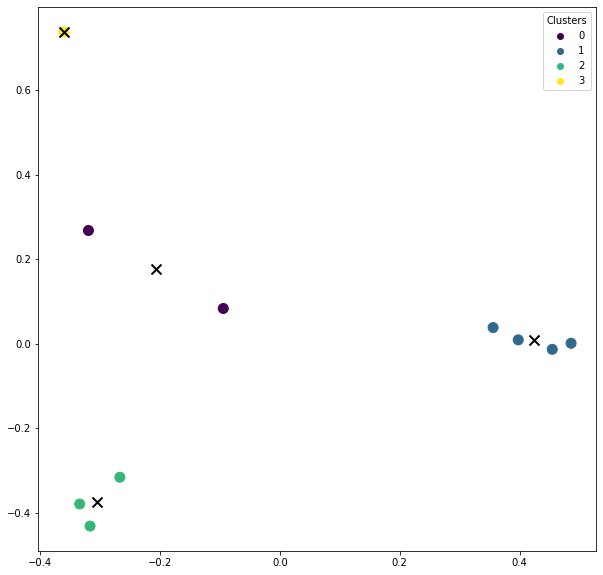

In [295]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Word Embeddings : le modèle Word2Vec

## Imports

In [1]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

## Chargement et traitement des phrases du corpus

### Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [11]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [12]:
infile = f"../data/tmp/1958_clean.txt"
sentences = MySentences(infile)

In [13]:
print(sentences)

### Détection des bigrams

Article intéressant sur le sujet : https://towardsdatascience.com/word2vec-for-phrases-learning-embeddings-for-more-than-one-word-727b6cf723cf

In [14]:
bigram_phrases = Phrases(sentences)

L'object `phrases` peut être vu comme un large dictionnaire d'expressions multi-mots associées à un score, le *PMI-like scoring*. Ce dictionnaire est construit par un apprentissage sur base d'exemples.
Voir les références ci-dessous :
- https://arxiv.org/abs/1310.4546
- https://en.wikipedia.org/wiki/Pointwise_mutual_information

In [15]:
type(bigram_phrases.vocab)

dict

Il contient de nombreuses clés qui sont autant de termes observés dans le corpus

In [16]:
len(bigram_phrases.vocab.keys())

64803

Prenons une clé au hasard :

In [17]:
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

pompiers_ecoles


Le dictionnaire indique le score de cette coocurrence :

In [18]:
bigram_phrases.vocab[key_]

1

Lorsque l'instance de `Phrases` a été entraînée, elle peut concaténer les bigrams dans les phrases lorsque c'est pertinent.

In [19]:
%time bigram_phrases[sentences]

CPU times: user 499 ms, sys: 846 µs, total: 500 ms
Wall time: 512 ms


### Conversion des `Phrases` en objet `Phraser`

`Phraser` est un alias pour `gensim.models.phrases.FrozenPhrases`, voir ici https://radimrehurek.com/gensim/models/phrases.html.

Le `Phraser` est une version *light* du `Phrases`, plus optimale pour transformer les phrases en concaténant les bigrams.

In [20]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

Le `Phraser` est un objet qui convertit certains unigrams d'une liste en bigrams lorsqu'ils ont été identifiés comme pertinents.

In [21]:
%time bigram_phraser[sentences]

CPU times: user 446 ms, sys: 8.78 ms, total: 454 ms
Wall time: 465 ms


### Extraction des trigrams

Nous répétons l'opération en envoyant cette fois la liste de bigrams afin d'extraire les trigrams.

In [22]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [23]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigrams

In [24]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [25]:
print(corpus[:100])

[['ville_bruxelles', 'rapport_annuel', 'presente', 'conseil', 'seance', 'bourgmestre_echevins', 'execution', 'article', 'loi', 'mars', 'imprimerie', 'schaumans', 'parvis', 'saint', 'gilles', 'bruxelles', 'chapitre', 'administration', 'chapitre', 'administration', 'conseil', 'reuni', 'cours_annee', 'tenu', 'seances', 'sections', 'reunies', 'seances', 'sections', 'seances', 'commissions', 'comites', 'visite', 'chantiers', 'internationale', 'theatre', 'fondations', 'reunies', 'cite', 'jouet', 'rey', 'juliette', 'inaugure', 'brigade', 'canine', 'police', 'locaux', 'service', 'ves', 'assiste', 'essais', 'carillon', 'electronique', 'hotel', 'annee', 'college', 'reuni', 'pris', 'decisions', 'nombre', 'agents', 'fonctions', 'administration', 'centrale', 'services', 'exterieurs', 'dependent', 'agents', 'effectifs', 'agents', 'temporaires', 'police', 'fiq', 'iii', 'sapeurs_pompiers', 'ecoles', 'personnel', 'salarie', 'concierges', 'domaine', 'prive', 'vii', 'nettoyeuses', 'femmes_service', 'tota

## Entrainement d'un modèle Word2Vec sur ce corpus

In [26]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=7, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=10 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: user 433 ms, sys: 0 ns, total: 433 ms
Wall time: 459 ms


#### Remarque

Vous voyez ici que l'entrainement du modèle est parallélisé (sur 4 workers).

Lors qu'on parallélise l'entrainement du modèle, 4 modèles "séparés" sont entrainés sur environ un quart des phrases.

Ensuite, les résultats sont agrégés pour ne plus faire qu'un seul modèle.

On ne peut prédire quel worker aura quelle phrase, car il y a des aléas lors de la parallélisation (p. ex. un worker qui serait plus lent, etc.).

Du coup, les valeurs peuvent varier légèrement d'un entrainement à l'autre.

Mais, globalement, les résultats restent cohérents.

### Sauver le modèle dans un fichier

In [27]:
outfile = f"../data/1958.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [28]:
model = Word2Vec.load("../data/bulletins.model")

### Imprimer le vecteur d'un terme

In [29]:
model.wv["bruxelles"]

array([ 0.03666609, -0.10040963,  0.03654497,  0.09746505,  0.03343763,
       -0.03119738, -0.03212402,  0.02686526, -0.08945952,  0.0548064 ,
        0.04578976, -0.0410102 ,  0.04764709, -0.01300347,  0.02187117,
       -0.02530024, -0.02506259,  0.02995131,  0.01435767,  0.0954808 ,
       -0.00400413,  0.06046201,  0.01500096, -0.00477403,  0.02370468,
        0.09968854, -0.01848824,  0.05762551, -0.06189843, -0.00792185,
        0.05806829,  0.0392398 ], dtype=float32)

### Calculer la similarité entre deux termes

In [30]:
model.wv.similarity("eleve", "ecole")

-0.04627937

In [31]:
model.wv.similarity("ecole", "enseignement")

0.14080766

In [32]:
model.wv.similarity("eleves", "enseignement")

0.10957636

In [33]:
model.wv.similarity("eleve", "andre")

0.5452789

### Chercher les mots les plus proches d'un terme donné

In [34]:
model.wv.most_similar("eleve", topn=10)

[('andre', 0.5452788472175598),
 ('nombre_total', 0.5224970579147339),
 ('accord', 0.49939364194869995),
 ('voir', 0.48816365003585815),
 ('expropriation', 0.4870023727416992),
 ('geographie', 0.48583516478538513),
 ('malades', 0.48367902636528015),
 ('administration_communale', 0.479801207780838),
 ('bois', 0.46865031123161316),
 ('admission', 0.4654456079006195)]

In [35]:
model.wv.most_similar("andre", topn=10)

[('tuyaux', 0.628588855266571),
 ('reuni', 0.5898244976997375),
 ('experience', 0.5628107786178589),
 ('eleve', 0.5452788472175598),
 ('relative', 0.5288161039352417),
 ('habitants', 0.5254650712013245),
 ('registres_population', 0.5208917260169983),
 ('etienne', 0.5188571810722351),
 ('reparation', 0.5174610614776611),
 ('annees', 0.5140024423599243)]

In [36]:
model.wv.most_similar("enseignement", topn=10)

[('mois', 0.6234209537506104),
 ('exposition', 0.5855048298835754),
 ('bourgmestre', 0.5816928148269653),
 ('plafonnage', 0.579774796962738),
 ('effectifs', 0.5771617293357849),
 ('suppression', 0.5762450098991394),
 ('nes', 0.5718750357627869),
 ('belgique', 0.5703576803207397),
 ('fevrier', 0.5668333172798157),
 ('publique', 0.5484593510627747)]

### Faire des recherches complexes à travers l'espace vectoriel

In [37]:
print(model.wv.most_similar(positive=['bruxelles', 'france'], negative=['belgique']))

[('utilisation', 0.5564562678337097), ('eclairage', 0.5360033512115479), ('centre_sante', 0.5359033346176147), ('administratif', 0.5171180963516235), ('defauts', 0.5048459768295288), ('quartier', 0.5017017126083374), ('aupres', 0.4993170499801636), ('quitte', 0.4975280165672302), ('chiffre', 0.4873804450035095), ('esprit', 0.4821018576622009)]


In [38]:
print(model.wv.most_similar(positive=['cours', 'ecole'], negative=['bruxelles']))

[('grands_travaux', 0.5812001824378967), ('jonction', 0.5400947332382202), ('full_time', 0.5200813412666321), ('louvain', 0.5037940740585327), ('brevet', 0.5007188320159912), ('suivent', 0.49671670794487), ('cours_annee_scolaire', 0.4873899519443512), ('harmonie', 0.4728219509124756), ('possede', 0.4692592918872833), ('union', 0.4506838023662567)]
